In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [30]:
dataset = pd.read_csv("customer_booking.csv",encoding="ISO-8859-1")
dataset.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [32]:
dataset.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [33]:
dataset.shape

(50000, 14)

In [34]:
dataset["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [35]:
mapping = {
   'Sat':6, 'Wed':3, 'Thu':4, 'Mon':1, 'Sun':7, 'Tue':2, 'Fri':5 
}

dataset["flight_day"]=dataset["flight_day"].map(mapping)
dataset.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [36]:
dataset.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [37]:
dataset["booking_complete"].value_counts()
#Only 7478 booking are completed

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [38]:
dataset["sales_channel"].value_counts()

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64

In [39]:
by_internet = (dataset["sales_channel"].value_counts().values[0])*100/dataset["sales_channel"].count()
by_mobile = (dataset["sales_channel"].value_counts().values[1])*100/dataset["sales_channel"].count()
print(f"Booking by Inernet is {by_internet}%")
print(f"Booking by Inernet is {by_mobile}%")

Booking by Inernet is 88.764%
Booking by Inernet is 11.236%


In [40]:
dataset["trip_type"].value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

In [41]:
RoundTrip = (dataset["trip_type"].value_counts().values[0])*100/dataset["trip_type"].count()
OneWay = (dataset["trip_type"].value_counts().values[1])*100/dataset["trip_type"].count()
CircleTrip = ((dataset["trip_type"].value_counts().values[2])*100/dataset["trip_type"].count())
print(f"RoundTrip is {RoundTrip}%")
print(f"OneWay is {OneWay}%")
print(f"CircleTrip is {CircleTrip}%")

RoundTrip is 98.994%
OneWay is 0.774%
CircleTrip is 0.232%


In [42]:
dataset['booking_origin'].unique() , (dataset['booking_origin'] == "(not set)").sum()

(array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
        'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
        'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
        'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
        'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
        'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
        'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
        'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
        'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
        'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
        'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
        'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
        'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
        'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
   

<Axes: xlabel='purchase_lead', ylabel='Count'>

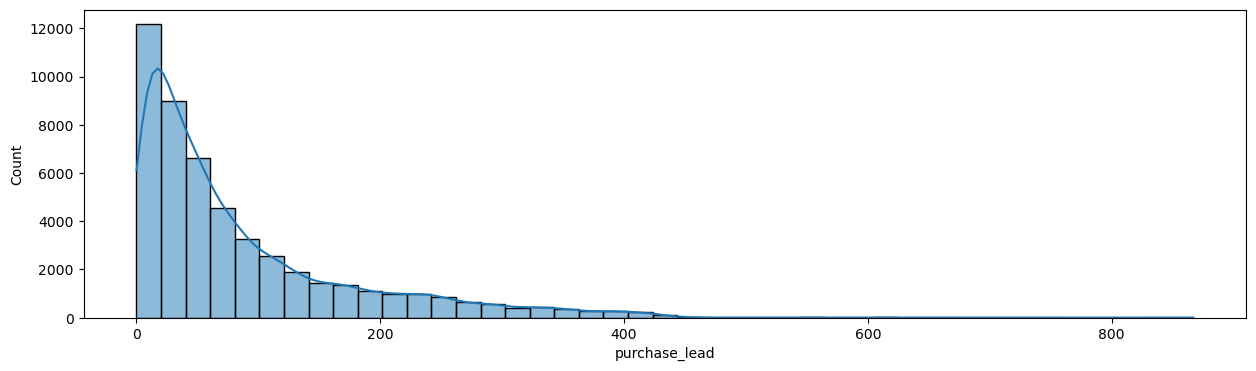

In [43]:
plt.figure(figsize=(15,4))
sns.histplot(data=dataset,x="purchase_lead",binwidth=20,kde=True)

In [44]:
working_df=dataset.drop(columns=['sales_channel', 'trip_type', 'route','booking_origin'])


In [45]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss_df = ss.fit_transform(working_df)

In [46]:
ss_df = pd.DataFrame(ss_df,columns=working_df.columns)
ss_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0.400684,1.957530,-0.119353,-0.381764,1.096754,0.703747,-0.649919,-0.863497,-1.174175,-0.419359
1,-0.579559,0.299164,-0.089844,-1.120780,1.096754,-1.420965,-0.649919,-0.863497,-1.174175,-0.419359
2,0.400684,1.747470,-0.030824,1.465775,-0.408687,0.703747,1.538654,-0.863497,-1.174175,-0.419359
3,-0.579559,0.122272,0.234761,-0.936026,1.096754,-1.420965,-0.649919,1.158082,-1.174175,-0.419359
4,0.400684,-0.187290,-0.030824,1.096267,-0.408687,0.703747,-0.649919,1.158082,-1.174175,-0.419359
...,...,...,...,...,...,...,...,...,...,...
49995,0.400684,-0.640577,-0.502977,-0.012257,1.096754,0.703747,-0.649919,1.158082,-1.107368,-0.419359
49996,-0.579559,0.288108,-0.502977,-0.936026,1.598567,-1.420965,-0.649919,-0.863497,-1.107368,-0.419359
49997,-0.579559,-0.673744,-0.502977,2.389544,1.096754,-1.420965,-0.649919,1.158082,-1.107368,-0.419359
49998,-0.579559,-0.773246,-0.502977,0.357251,-1.412314,0.703747,-0.649919,1.158082,-1.107368,-0.419359


<Axes: >

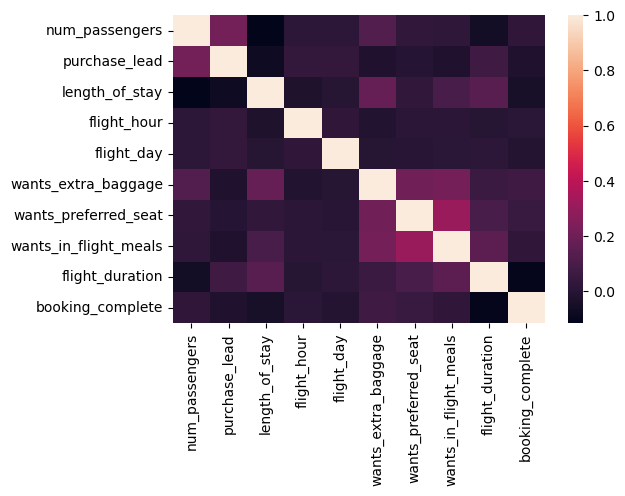

In [47]:
corr = ss_df.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr)

# Train & Test Data

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x = ss_df.iloc[:,:-1]
y = ss_df["booking_complete"]
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif as mic

from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")



In [51]:
y = [int(label) for label in y]

In [52]:
# Calculating the Mutual Information Scores.
fi_scores = mic(x, y)
fi_df = pd.DataFrame({"Columns": x.columns, "Feature_Importance_Score": fi_scores})
fi_df = fi_df.sort_values(by="Feature_Importance_Score", ascending=False)
fi_df

,Columns,Feature_Importance_Score
8,flight_duration,0.017698
2,length_of_stay,0.008567
5,wants_extra_baggage,0.006917
7,wants_in_flight_meals,0.004889
6,wants_preferred_seat,0.004436
1,purchase_lead,0.002475
4,flight_day,0.002169
0,num_passengers,0.002130
3,flight_hour,0.001048


# Data Vizualization: Feature Importance Barplot

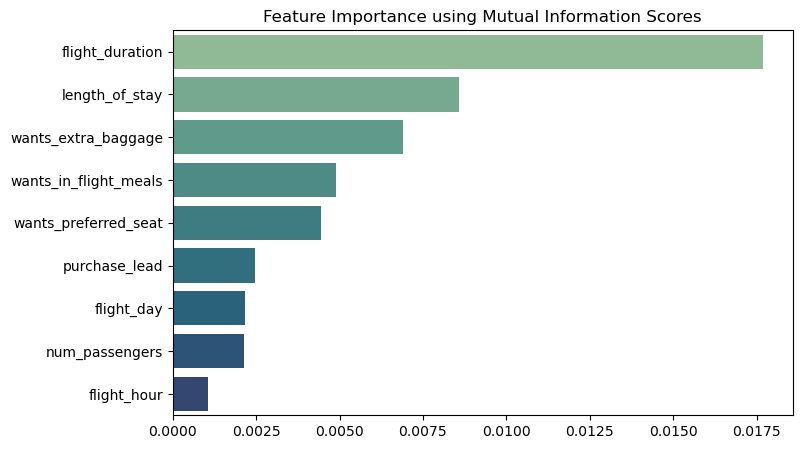

In [53]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Feature_Importance_Score", y="Columns", data=fi_df, palette="crest")
plt.title("Feature Importance using Mutual Information Scores")
plt.xlabel("")
plt.ylabel("")
plt.savefig("BA_DS.jpg")
plt.show()

# Model Training and Cross-Validation

In [58]:
# Function to split the data into training and validation set.
def train_val_split(X, y):
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=7)
    return train_x, test_x, train_y, test_y

# Function to select the top-n or all the features from data.
def selecting_top_n_or_all_features(n=5):
    if str(n).lower() == "all":
        x = ss_df[list(fi_df.Columns)]
    else:
        x = ss_df[list(fi_df.Columns[:n])]
    # One-Hot-Encoding the variables which were Categorical variables prior to Label-Encoding.
    for col in x.select_dtypes("int32"):
        x = pd.get_dummies(x, columns=[col])
    return x

# Function to fit the data on RandomForestClassifier and product training and validation scores.
def fit_rfc(top_n):
    x = selecting_top_n_or_all_features(top_n)
    train_x, test_x, train_y, test_y = train_test_split(x, y)

    # Normalizing the Dataset.
    scaler = MinMaxScaler()
    train_x = scaler.fit_transform(train_x)
    test_x = scaler.transform(test_x)
    
    model = RandomForestClassifier(random_state=7)
    model.fit(train_x, train_y)
    
    train_y_pred = model.predict(train_x)
    test_y_pred = model.predict(test_x)
    
    print("Training Accuracy Score:", accuracy_score(train_y, train_y_pred))
    print("Validation Accuracy Score:", accuracy_score(test_y, test_y_pred))

In [59]:
print("\n===== Model Evaluation for Top-6 features =====\n")
fit_rfc(6)


===== Model Evaluation for Top-6 features =====

Training Accuracy Score: 0.9704266666666667
Validation Accuracy Score: 0.80968


In [60]:
print("\n===== Model Evaluation for All features =====\n")
fit_rfc("all")


===== Model Evaluation for All features =====

Training Accuracy Score: 0.99952
Validation Accuracy Score: 0.84624
